In [41]:
from requests import get
from joblib.memory import Memory
import pandas as pd

cache = Memory("cache", verbose=0).cache
get = cache(get)

params = dict(
    type="query",
    query='type:Article text:"ai safety"',
    size=str(5_000),
    token="d146723d71f526e2562d2fc403b0f3d4",
)
response = get("https://kg.diffbot.com/kg/v3/dql", params=params)
# print(response.text[:1000])
data = response.json()["data"]
data = [d["entity"] for d in data]
df = pd.DataFrame(data)
df["date"] = df["date"].apply(lambda x: x["str"][1:] if not pd.isna(x) else None)
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df = df[["date", "sentiment"]].dropna()
rdf = df
rdf.head()


,date,sentiment
0,2024-06-04 13:00:00,0.000
2,2023-11-18 00:00:00,-0.303
4,2019-08-15 00:00:00,0.000
5,2023-11-22 11:19:00,0.000
9,2023-02-22 00:00:00,0.000


/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_45856/4138525872.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["count"].resample("M").sum().plot()


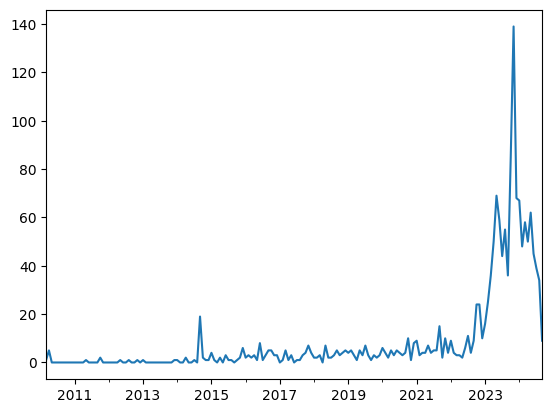

/var/folders/6v/w9nn6c_n4qdbrjwfnq7695n00000gn/T/ipykernel_45856/4138525872.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["sentiment"].resample("M").mean().plot()


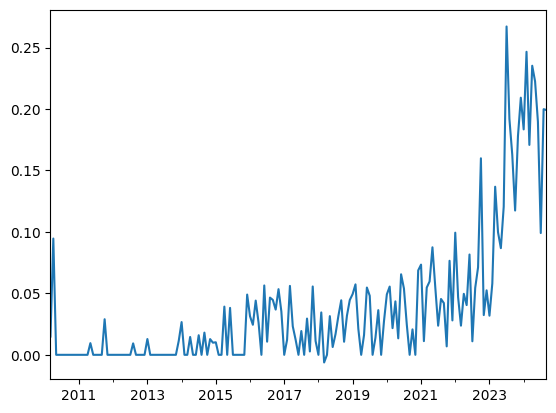

In [46]:
import matplotlib.pyplot as plt

df = rdf.copy()
# aggregate counts and mean sentiment by day
df = df[df["date"] >= "2010-01-01"]
df = (
    df.groupby("date")
    .agg({"sentiment": ["count", "mean"]})
    .droplevel(0, axis=1)
    .rename(columns={"count": "count", "mean": "sentiment"})
)
# fill missing dates with 0 counts and NaN sentiment

df = df.reindex(pd.date_range(df.index.min(), df.index.max(), freq="D"), fill_value=0)
df.columns = ["count", "sentiment"]
# plot counts and sentiment
# df["count"].plot()
# df["sentiment"].plot(secondary_y=True)
# plt.show()
# by month
df["count"].resample("M").sum().plot()
plt.show()
df["sentiment"].resample("M").mean().plot()
plt.show()


In [47]:
from hello.data import get_data

get_data()


,count,sentiment
2010-03-08,1,0.357
2010-03-09,0,0.000
2010-03-10,0,0.000
2010-03-11,0,0.000
2010-03-12,0,0.000
...,...,...
2024-09-06,0,0.000
2024-09-07,0,0.000
2024-09-08,0,0.000
2024-09-09,1,0.509
